In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AffinityPropagation

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]].values
#to choose the prefered columns

In [16]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [59]:
clustModel= AffinityPropagation(damping=0.9,preference=-100)
Label=clustModel.fit_predict(x)

In [60]:
exemplars = clustModel.cluster_centers_
num_clusters = len(exemplars)
print("Number of clusters:", num_clusters)

Number of clusters: 6


In [61]:
print("Exemplars:\n", exemplars)

Exemplars:
 [[ 58  60]
 [ 60  40]
 [ 97  32]
 [ 99  39]
 [137  18]
 [137  83]]


In [37]:
spvd=pd.DataFrame(dataset)
spvd['Cluster_group']=Label
spvd

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,4
197,198,Male,32,126,74,5
198,199,Male,32,137,18,4


In [40]:
import seaborn as sns

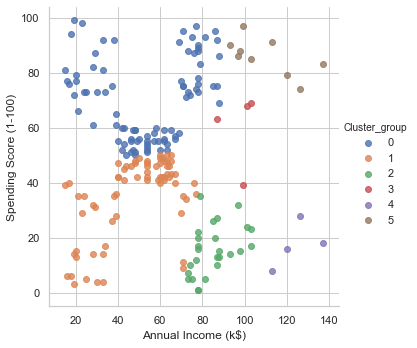

In [108]:
facet=sns.lmplot(data=spvd,x=spvd.columns[3],y=spvd.columns[4], hue=spvd.columns[5], fit_reg=False,legend=True,)
#here i'm trying do the visualisation using seaborn

In [76]:
# spvd.to_csv("clusterofMallData.csv",index=False)
cluster_centers_indices = clustModel.cluster_centers_indices_
print("Cluster Center Indices:", cluster_centers_indices)

Cluster Center Indices: [ 88  93 180 184 198 199]


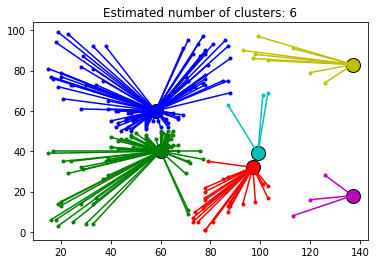

In [81]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmyk')

for k, col in zip (range(num_clusters), colors):
    class_members = Label == k
    cluster_center = x[cluster_centers_indices[k]]
    
    plt.plot(x[class_members, 0], x[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    
    for xi in x[class_members]:
        plt.plot([cluster_center[0], xi[0]], [cluster_center[1], xi[1]], col)

plt.title('Estimated number of clusters: %d' % num_clusters)
plt.show()